### Imports

In [1]:
import json
import os
import pandas as pd
import numpy as np
from statsbombpy import sb
from tqdm.notebook import tqdm
mwc = sb.matches(competition_id=43, season_id=106)
wwc = sb.matches(competition_id=72, season_id=107)
matchids = mwc['match_id']
watchids = wwc['match_id']

/home/penn/anaconda3/lib/python3.8/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/home/penn/anaconda3/lib/python3.8/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


### Load Data

In [2]:
mdata = []
for matchid in tqdm(matchids):
    data = sb.events(matchid,fmt=dict)
    mdata.append(data)
    
    
wdata = []
for matchid in tqdm(watchids):
    data = sb.events(matchid,fmt=dict)
    wdata.append(data)

  0%|          | 0/64 [00:00<?, ?it/s]

/home/penn/anaconda3/lib/python3.8/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


  0%|          | 0/64 [00:00<?, ?it/s]

### Length of Data

In [3]:
lcount = 0
for data in mdata:
    

    keys = list(data.keys())
    lcount+= len(keys)
        
            
lcountw = 0
for data in wdata:
    
    
    keys = list(data.keys())
    lcountw += len(keys)
print('Events/Game (Mens): ' + str(int(np.around(lcount/64))))
print('Events/Game (Womens): ' + str(int(np.around(lcountw/64))))


Events/Game (Mens): 3666
Events/Game (Womens): 3534


### Get Mary Earps' Penalty Save

In [4]:
data = wdata[1]
keys = list(data.keys())
for key in keys:
    datum = data[key]
    if str(datum).find('enalty') > -1:
        print(key,datum)
        print('--------------------------------------------')

77c87ab7-b1c2-48cf-8ca2-0270847dcad9 {'id': '77c87ab7-b1c2-48cf-8ca2-0270847dcad9', 'index': 2698, 'period': 2, 'timestamp': '00:18:29.003', 'minute': 63, 'second': 29, 'type': {'id': 22, 'name': 'Foul Committed'}, 'possession': 143, 'possession_team': {'id': 863, 'name': "Spain Women's"}, 'play_pattern': {'id': 1, 'name': 'Regular Play'}, 'team': {'id': 865, 'name': "England Women's"}, 'player': {'id': 4658, 'name': 'Keira Walsh'}, 'position': {'id': 11, 'name': 'Left Defensive Midfield'}, 'location': [13.9, 43.9], 'duration': 0.0, 'foul_committed': {'penalty': True, 'type': {'id': 24, 'name': 'Handball'}}, 'match_id': 3906390}
--------------------------------------------
cbe15a9c-da5e-4005-a46f-4ded6839727b {'id': 'cbe15a9c-da5e-4005-a46f-4ded6839727b', 'index': 2700, 'period': 2, 'timestamp': '00:24:01.735', 'minute': 69, 'second': 1, 'type': {'id': 16, 'name': 'Shot'}, 'possession': 144, 'possession_team': {'id': 863, 'name': "Spain Women's"}, 'play_pattern': {'id': 5, 'name': 'Oth

In [5]:
data['47f30c2d-87ee-4328-b6b4-7d4f35287521']

{'id': '47f30c2d-87ee-4328-b6b4-7d4f35287521',
 'index': 2701,
 'period': 2,
 'timestamp': '00:24:02.251',
 'minute': 69,
 'second': 2,
 'type': {'id': 23, 'name': 'Goal Keeper'},
 'possession': 145,
 'possession_team': {'id': 865, 'name': "England Women's"},
 'play_pattern': {'id': 1, 'name': 'Regular Play'},
 'team': {'id': 865, 'name': "England Women's"},
 'player': {'id': 31538, 'name': 'Mary Alexandra Earps'},
 'position': {'id': 1, 'name': 'Goalkeeper'},
 'location': [1.0, 40.0],
 'duration': 0.0,
 'related_events': ['cbe15a9c-da5e-4005-a46f-4ded6839727b'],
 'goalkeeper': {'technique': {'id': 45, 'name': 'Diving'},
  'position': {'id': 44, 'name': 'Set'},
  'body_part': {'id': 35, 'name': 'Both Hands'},
  'type': {'id': 29, 'name': 'Penalty Saved'},
  'outcome': {'id': 15, 'name': 'Success'}},
 'match_id': 3906390}

### Total Passes

In [6]:
pcount = 0
for data in mdata:
    

    keys = list(data.keys())
    for key in keys:
        if data[key]['period'] == 3:
            break
        if data[key]['type']['name'] == 'Pass':
            pcount+=1
        
            
pcountw = 0
for data in wdata:
    
    
    keys = list(data.keys())
    for key in keys:
        if data[key]['period'] == 3:
            break
        if data[key]['type']['name'] == 'Pass':
            pcountw+=1
print('Passes/Game (Mens): ' + str(int(np.around(pcount/64))))
print('Passes/Game (Womens): ' + str(int(np.around(pcountw/64))))
print('Passes/Game (Ratio): ' + str(np.around(pcountw/pcount,2)))
         

Passes/Game (Mens): 1046
Passes/Game (Womens): 919
Passes/Game (Ratio): 0.88


### Forward Passes (All)

In [7]:
fcount = 0
for data in mdata:
    

    keys = list(data.keys())
    for key in keys:
        if data[key]['period'] == 3:
            break
        if data[key]['type']['name'] == 'Pass' and data[key]['pass']['end_location'][0] > data[key]['location'][0]:
            fcount+=1
        
            
fcountw = 0
for data in wdata:
    
    
    keys = list(data.keys())
    for key in keys:
        if data[key]['period'] == 3:
            break
        if data[key]['type']['name'] == 'Pass'and data[key]['pass']['end_location'][0] > data[key]['location'][0]:
            fcountw+=1
print('Forward Passes/Game (Mens): ' + str(int(np.around(fcount/64))))
print('Forward Passes/Game (Womens): ' + str(int(np.around(fcountw/64))))
print('Forward Passes/Game (Ratio): ' + str(np.around(fcountw/fcount,2)))           
print('P(pass is forwards) (Mens): ' + str(np.around(fcount/pcount,2)))
print('P(pass is forwards) (Womens): ' + str(np.around(fcountw/pcountw,2)))

Forward Passes/Game (Mens): 642
Forward Passes/Game (Womens): 609
Forward Passes/Game (Ratio): 0.95
P(pass is forwards) (Mens): 0.61
P(pass is forwards) (Womens): 0.66


### Forward Passes (Thresholded)

In [8]:
limits = [10,20,30,40]
for lim in limits:
    print('Limit: ' + str(lim))
    bfcount = 0
    for data in mdata:


        keys = list(data.keys())
        for key in keys:
            if data[key]['period'] == 3:
                break
            if data[key]['type']['name'] == 'Pass' and data[key]['pass']['end_location'][0] > data[key]['location'][0]+lim:
                bfcount+=1


    bfcountw = 0
    for data in wdata:


        keys = list(data.keys())
        for key in keys:
            if data[key]['period'] == 3:
                break
            if data[key]['type']['name'] == 'Pass'and data[key]['pass']['end_location'][0] > data[key]['location'][0]+lim:
                bfcountw+=1
    print('Big Forward Passes/Game (Mens): ' + str(int(np.around(bfcount/64))))
    print('Big Forward Passes/Game (Womens): ' + str(int(np.around(bfcountw/64))))
    print('Big Forward Passes/Game (Ratio): ' + str(np.around(bfcountw/bfcount,2)))           
    print('P(pass is big forwards) (Mens): ' + str(np.around(bfcount/pcount,2)))
    print('P(pass is big forwards) (Womens): ' + str(np.around(bfcountw/pcountw,2)))
    print('---------------------------------------')

Limit: 10
Big Forward Passes/Game (Mens): 340
Big Forward Passes/Game (Womens): 349
Big Forward Passes/Game (Ratio): 1.03
P(pass is big forwards) (Mens): 0.32
P(pass is big forwards) (Womens): 0.38
---------------------------------------
Limit: 20
Big Forward Passes/Game (Mens): 142
Big Forward Passes/Game (Womens): 163
Big Forward Passes/Game (Ratio): 1.15
P(pass is big forwards) (Mens): 0.14
P(pass is big forwards) (Womens): 0.18
---------------------------------------
Limit: 30
Big Forward Passes/Game (Mens): 77
Big Forward Passes/Game (Womens): 92
Big Forward Passes/Game (Ratio): 1.19
P(pass is big forwards) (Mens): 0.07
P(pass is big forwards) (Womens): 0.1
---------------------------------------
Limit: 40
Big Forward Passes/Game (Mens): 50
Big Forward Passes/Game (Womens): 54
Big Forward Passes/Game (Ratio): 1.07
P(pass is big forwards) (Mens): 0.05
P(pass is big forwards) (Womens): 0.06
---------------------------------------


### xPasses

In [9]:

match = [] #match number
half = [] #half number
players = [] #player ids
opponents = [] #opponent player ids
typ = [] #relevant codes
time = [] #time
etime = [] #ending time
xs = [] #x coords 
xe = [] #x end coords
ys = [] #y coords 
ye = []#y end coords
outcomes = []
overall_players = []
overall_stats = []
for data in mdata:
    keys = list(data.keys())
    for key in keys:
        ################## Finding player ###################



        if data[key]['type']['id'] == 30:
            idin = data[key]['player']['id']
            try:
                _ = data[key]['pass']['outcome']
                typ.append(118)
                outcomes.append(0)
            except:
                typ.append(117)
                outcomes.append(1)
            start_pos = data[key]['location']
            end_pos = data[key]['pass']['end_location']
            match.append('123')
            half.append(data[key]['period'])
            players.append(idin)
            opponents.append('123')
            time.append(data[key]['minute']*60 + data[key]['second'])
            etime.append(time[-1]+6)
            xs.append(start_pos[0])
            ys.append(start_pos[1])
            xe.append(end_pos[0])
            ye.append(end_pos[1])
            
            
            
for n in range(len(xs)):
    xs[n] = (xs[n]/120)*105
    ys[n] = (ys[n]/80)*68
    xe[n] = (xe[n]/120)*105
    ye[n] = (ye[n]/80)*68            
#Converting json into a pandas data frame
import pandas as pd
current = pd.DataFrame (list(zip(match, half, players, opponents, typ, time, etime, xs, xe, ys, ye)), columns = ["match", "half", "pl", "opp", "typ", "t", "tend", "x", "xend", "y", "yend"])
# Adding new parameters ()

#time since previous pass
current['previous_time'] = current.groupby("match")["t"].shift()
current["dt"] = current["t"] - current["previous_time"]
current["dt"] = current["dt"].fillna(0)
current["dt"] = current["dt"].apply(lambda x: 0 if x < 0 else x)

#if the ball was intercepted
current["previous_possesion"] = current.groupby("match")['typ'].shift()
current['intercept'] = current['previous_possesion'].apply(lambda x: 0 if x == 117 else 1)
current['intercept'] = current['intercept'].fillna(0)

#was the pass succesful
current["outcome"] = current["typ"].apply(lambda x: 1 if x == 117 else 0)

#length of the pass
current["x"] = current["x"].astype(float)
current["xend"] = current["xend"].astype(float)
current["xend"] = current["xend"].fillna(current["x"])
current["y"] = current["y"].astype(float)
current["y_relative"] = np.abs(current["y"] - 34)
current["yend"] = current["yend"].astype(float)
current["yend"] = current["yend"].fillna(current["y"])
current["yend_relative"] = np.abs(current["yend"] - 34) # distance from the centre
current["length"] = np.sqrt((current["x"]-current["xend"]) ** 2 + (current["y"]-current["yend"]) ** 2)

xc_ave = current.groupby(["match", "pl"])["x"].mean()
yc_ave = current.groupby(["match", "pl"])["y_relative"].mean()
xc_ave = xc_ave.to_frame()
yc_ave = yc_ave.to_frame()
xcdata = current.merge(xc_ave, on = ["match", "pl"])
xycdata = xcdata.merge(yc_ave, on = ["match", "pl"])
current = xycdata

current_features = current.drop(['match', 'typ', "half", "pl", "opp", "tend", "previous_time", "previous_possesion","outcome", "yend", "y", "dt", "x_x", "y_relative_x", "t"], axis=1)

import pickle
import matplotlib.pyplot as plt
with open('gam2.pkl', 'rb') as f:
    gam = pickle.load(f)
exp = gam.predict_mu(current_features)
predicted_current = current.assign(predicted_outcome = exp)

passes_current = current.groupby("pl")["outcome"].sum().to_frame()
predicted_passes_current = predicted_current.groupby("pl")["predicted_outcome"].sum().to_frame()

#Checking the accuracy of the bins and adjusting the data accordingly
predicted_current["predicted_bins"] = pd.cut(predicted_current["predicted_outcome"], bins = 20)
bins = predicted_current.groupby("predicted_bins")["outcome"].mean().to_frame()
data = predicted_current.merge(bins, on = "predicted_bins")
data["adjusted"] = data["predicted_outcome"].mask(data["predicted_outcome"] < 0.0527, data["outcome_y"])
players = data["pl"].to_list() #players
codes = data["typ"].to_list() #codes of the
xgs_m =data["predicted_outcome"].to_list() # expected passes 
print('Mean Pass xG (Mens):')
print(np.mean(xgs_m))




Mean Pass xG (Mens):
0.8302986210456866


In [10]:

match = [] #match number
half = [] #half number
players = [] #player ids
opponents = [] #opponent player ids
typ = [] #relevant codes
time = [] #time
etime = [] #ending time
xs = [] #x coords 
xe = [] #x end coords
ys = [] #y coords 
ye = []#y end coords
outcomes = []
overall_players = []
overall_stats = []
for data in wdata:
    keys = list(data.keys())
    for key in keys:
        ################## Finding player ###################



        if data[key]['type']['id'] == 30:
            idin = data[key]['player']['id']
            try:
                _ = data[key]['pass']['outcome']
                typ.append(118)
                outcomes.append(0)
            except:
                typ.append(117)
                outcomes.append(1)
            start_pos = data[key]['location']
            end_pos = data[key]['pass']['end_location']
            match.append('123')
            half.append(data[key]['period'])
            players.append(idin)
            opponents.append('123')
            time.append(data[key]['minute']*60 + data[key]['second'])
            etime.append(time[-1]+6)
            xs.append(start_pos[0])
            ys.append(start_pos[1])
            xe.append(end_pos[0])
            ye.append(end_pos[1])
            
            
            
for n in range(len(xs)):
    xs[n] = (xs[n]/120)*105
    ys[n] = (ys[n]/80)*68
    xe[n] = (xe[n]/120)*105
    ye[n] = (ye[n]/80)*68            
#Converting json into a pandas data frame
import pandas as pd
current = pd.DataFrame (list(zip(match, half, players, opponents, typ, time, etime, xs, xe, ys, ye)), columns = ["match", "half", "pl", "opp", "typ", "t", "tend", "x", "xend", "y", "yend"])
# Adding new parameters ()

#time since previous pass
current['previous_time'] = current.groupby("match")["t"].shift()
current["dt"] = current["t"] - current["previous_time"]
current["dt"] = current["dt"].fillna(0)
current["dt"] = current["dt"].apply(lambda x: 0 if x < 0 else x)

#if the ball was intercepted
current["previous_possesion"] = current.groupby("match")['typ'].shift()
current['intercept'] = current['previous_possesion'].apply(lambda x: 0 if x == 117 else 1)
current['intercept'] = current['intercept'].fillna(0)

#was the pass succesful
current["outcome"] = current["typ"].apply(lambda x: 1 if x == 117 else 0)

#length of the pass
current["x"] = current["x"].astype(float)
current["xend"] = current["xend"].astype(float)
current["xend"] = current["xend"].fillna(current["x"])
current["y"] = current["y"].astype(float)
current["y_relative"] = np.abs(current["y"] - 34)
current["yend"] = current["yend"].astype(float)
current["yend"] = current["yend"].fillna(current["y"])
current["yend_relative"] = np.abs(current["yend"] - 34) # distance from the centre
current["length"] = np.sqrt((current["x"]-current["xend"]) ** 2 + (current["y"]-current["yend"]) ** 2)

xc_ave = current.groupby(["match", "pl"])["x"].mean()
yc_ave = current.groupby(["match", "pl"])["y_relative"].mean()
xc_ave = xc_ave.to_frame()
yc_ave = yc_ave.to_frame()
xcdata = current.merge(xc_ave, on = ["match", "pl"])
xycdata = xcdata.merge(yc_ave, on = ["match", "pl"])
current = xycdata

current_features = current.drop(['match', 'typ', "half", "pl", "opp", "tend", "previous_time", "previous_possesion","outcome", "yend", "y", "dt", "x_x", "y_relative_x", "t"], axis=1)

import pickle
import matplotlib.pyplot as plt
with open('gam2.pkl', 'rb') as f:
    gam = pickle.load(f)
exp = gam.predict_mu(current_features)
predicted_current = current.assign(predicted_outcome = exp)

passes_current = current.groupby("pl")["outcome"].sum().to_frame()
predicted_passes_current = predicted_current.groupby("pl")["predicted_outcome"].sum().to_frame()

#Checking the accuracy of the bins and adjusting the data accordingly
predicted_current["predicted_bins"] = pd.cut(predicted_current["predicted_outcome"], bins = 20)
bins = predicted_current.groupby("predicted_bins")["outcome"].mean().to_frame()
data = predicted_current.merge(bins, on = "predicted_bins")
data["adjusted"] = data["predicted_outcome"].mask(data["predicted_outcome"] < 0.0527, data["outcome_y"])
players = data["pl"].to_list() #players
codes = data["typ"].to_list() #codes of the
xgs_w =data["predicted_outcome"].to_list() # expected passes 
print('Mean Pass xG (Womens):')
print(np.mean(xgs_w))

Mean Pass xG (Womens):
0.8018563451155177


### Summarise and Plot

In [11]:
risks = np.zeros((8,2)) #Low risk: < 10% Medium risk < 20%, High risk < 30%

arrs = [xgs_m,xgs_w]
for n in range(2):
    arr = np.array(arrs[n])
    risks[0,n] = np.sum(arr > 0.95)
    risks[1,n] = np.sum(arr > 0.9) - risks[0,n]
    risks[2,n] = np.sum(arr > 0.85) - np.sum(risks[:2,n])
    risks[3,n] = np.sum(arr > 0.8) - np.sum(risks[:3,n])
    risks[4,n] = np.sum(arr > 0.75) - np.sum(risks[:4,n])
    risks[5,n] = np.sum(arr > 0.7) - np.sum(risks[:5,n])
    
    risks[6,n] = np.sum(arr > 0.65) - np.sum(risks[:6,n])
    risks[7,n] = np.sum(arr > 0.6) - np.sum(risks[:7,n])
    

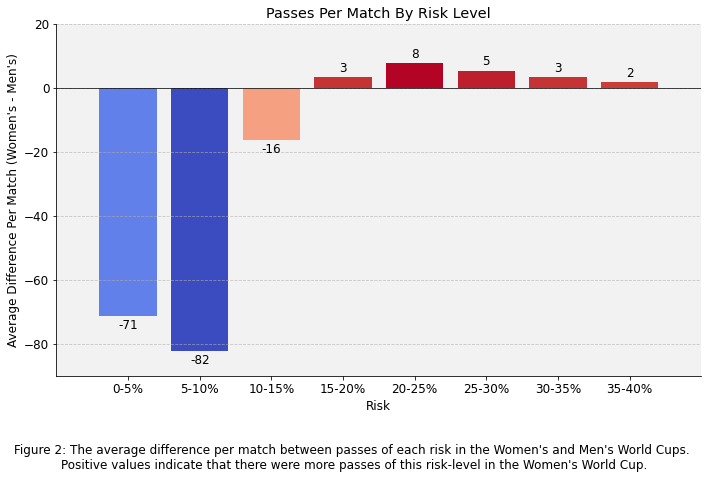

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Your data
rs = np.copy(risks)
percentage_diff = (rs[:,1] - rs[:,0])/64

# Create the figure and axis
plt.rcParams.update({'font.size': 12})
fig, ax = plt.subplots(figsize=(10, 6))

# Create the bar plot with a color gradient
colormap = plt.cm.get_cmap('coolwarm')
bars = ax.bar(np.arange(8), percentage_diff, color=[colormap((val - min(percentage_diff)) / (max(percentage_diff) - min(percentage_diff))) for val in percentage_diff])

# Add a horizontal line at y=0
ax.axhline(0, color='black', linewidth=0.7)

# Customize the x-axis ticks
ax.set_xticks(np.arange(8))
ax.set_xticklabels([f'{n * 5}-{(n + 1) * 5}%' for n in range(8)])

# Set the x-axis limits
ax.set_xlim([-1, 8])
ax.set_ylim([-90, 20])
# Set labels for the x and y axes
ax.set_xlabel('Risk')
ax.set_ylabel("Average Difference Per Match (Women's - Men's)")

# Add a title
ax.set_title('Passes Per Match By Risk Level')

# Add gridlines
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Add a legend (optional)
# ax.legend(['Percentage Difference'])

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for val,bar in zip(percentage_diff,bars):
    height = bar.get_height()
    if val < 0:
        ax.annotate(f'{height:.0f}', 
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, -3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='top')
    else:
        ax.annotate(f'{height:.0f}', 
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
# Add data labels above each bar



# Set a fancy-looking grey background color
ax.set_facecolor('#f2f2f2')

# Adjust plot layout
plt.tight_layout()
plt.figtext(0.5, -0.1,"Figure 2: The average difference per match between passes of each risk in the Women's and Men's World Cups. \nPositive values indicate that there were more passes of this risk-level in the Women's World Cup.", ha='center')
plt.savefig('Passing_Risk.jpg',dpi=300, bbox_inches='tight')
# Show the plot
plt.show()




### LT

In [13]:
counts = np.zeros((120,80))
xgs = np.zeros((120,80))

for data in mdata:
    keys = list(data.keys())[4:]
    posnum = 2
    curr_counts = np.zeros((120,80))
    xg = 0
    for key in keys:

        if data[key]['team']['name'] == data[key]['possession_team']['name'] and data[key]['possession'] == posnum:
            
            try:
                curr_counts[np.floor(data[key]['location'][0]).astype(int),np.floor(data[key]['location'][1]).astype(int)] += 1
            except:
                continue

            try:
                xg += data[key]['shot']['statsbomb_xg']
            except:
                pass
        else:
            

            counts += curr_counts
            xgs += xg*curr_counts
            
            curr_counts = np.zeros((120,80))
            posnum = data[key]['possession']
            xg = 0
            
for data in wdata:
    keys = list(data.keys())[4:]
    posnum = 2
    curr_counts = np.zeros((120,80))
    xg = 0
    for key in keys:

        if data[key]['team']['name'] == data[key]['possession_team']['name'] and data[key]['possession'] == posnum:
            try:
                curr_counts[np.floor(data[key]['location'][0]).astype(int),np.floor(data[key]['location'][1]).astype(int)] += 1
            except:
                continue

            try:
                xg += data[key]['shot']['statsbomb_xg']
            except:
                pass
        else:

            counts += curr_counts
            xgs += xg*curr_counts
            curr_counts = np.zeros((120,80))
            posnum = data[key]['possession']
            xg = 0
             

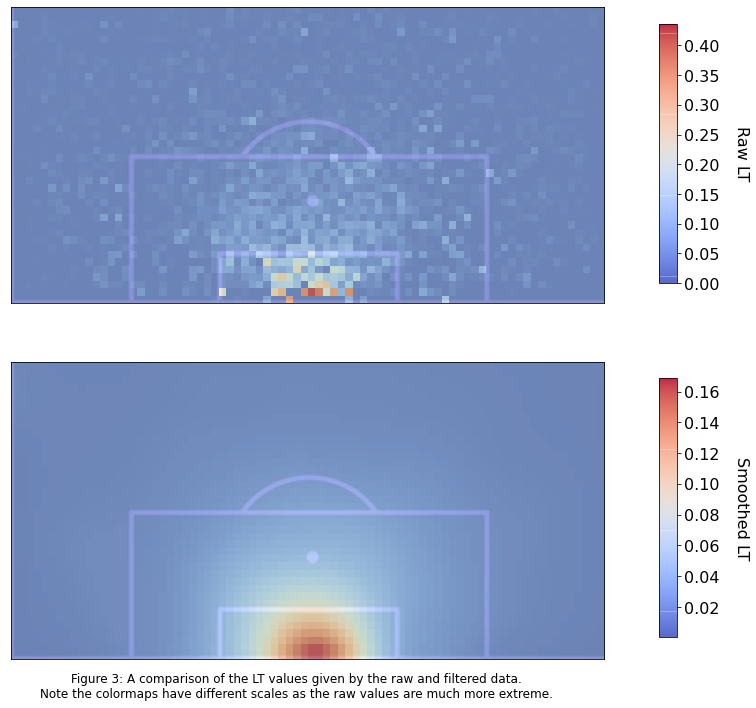

In [14]:
from scipy.ndimage import gaussian_filter
from matplotlib.colors import LinearSegmentedColormap
plt.rcParams.update({'font.size': 16})
original_data = xgs/(1e-8 + counts)


smoothed_data = np.zeros_like(original_data)
smoothed_data[:-1] = gaussian_filter(original_data[:-1,:],sigma=4,mode='nearest') ### There is very little data in the last row
smoothed_data[-1] = smoothed_data[-2]
image = plt.imread('Football_Pitch.jpg')

image = image[:,1600:].transpose(1,0,2)
image = np.flip(image,0)




heatmap_data = np.copy(smoothed_data[80:])


custom_cmap = 'coolwarm'

fig, ax = plt.subplots(2,figsize=(12,12))
ax[1].imshow(image)
ax[1].set_xticks([])
ax[1].set_yticks([])
cax = ax[1].imshow(heatmap_data, cmap=custom_cmap, alpha=0.6, interpolation='none', extent=[0, 1600, 0, 800])

cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.3]) 
cbar = fig.colorbar(cax, cax=cbar_ax)
cbar.set_label('Smoothed LT',rotation=270,labelpad = 30)



heatmap_data = np.copy(original_data[80:])


custom_cmap = 'coolwarm'

ax[0].imshow(image)
ax[0].set_xticks([])
ax[0].set_yticks([])
cax = ax[0].imshow(heatmap_data, cmap=custom_cmap, alpha=0.6, interpolation='none', extent=[0, 1600, 0, 800])

cbar_ax2 = fig.add_axes([0.92, 0.56, 0.02, 0.3]) 
cbar = fig.colorbar(cax, cax=cbar_ax2)
cbar.set_label('Raw LT',rotation=270,labelpad = 30)
plt.rcParams.update({'font.size': 12})
plt.figtext(0.5, 0.08,'Figure 3: A comparison of the LT values given by the raw and filtered data.\nNote the colormaps have different scales as the raw values are much more extreme.',ha='center')
plt.savefig('Heatmaps.jpg',dpi=300,bbox_inches='tight')
plt.show()



In [15]:
print('Max LT: ' + str(np.around(np.max(smoothed_data),2)))

Max LT: 0.17


In [16]:
passes = []
for data in mdata:
    

    keys = list(data.keys())
    for key in keys:

        if data[key]['type']['name'] == 'Pass':
            try:
                data[key]['pass']['outcome']
                continue
            except:
                pass
            pt_out = smoothed_data[min(119,int(data[key]['pass']['end_location'][0])),min(79,int(data[key]['pass']['end_location'][1]))]
            pt_in =  smoothed_data[min(119,int(data[key]['location'][0])),min(79,int(data[key]['location'][1]))]
            passes.append([-pt_in+pt_out])
            
        
passesw = []
for data in wdata:
    

    keys = list(data.keys())
    for key in keys:

        if data[key]['type']['name'] == 'Pass':
            try:
                data[key]['pass']['outcome']
                continue
            except:
                pass
            pt_out = smoothed_data[min(119,int(data[key]['pass']['end_location'][0])),min(79,int(data[key]['pass']['end_location'][1]))]
            pt_in =  smoothed_data[min(119,int(data[key]['location'][0])),min(79,int(data[key]['location'][1]))]
            passesw.append([-pt_in+pt_out])
passes = np.array(passes)
passesw = np.array(passesw)         

In [17]:
pts = np.zeros((8,2)) 
arrs = [passes,passesw]
for n in range(2):
    arr = np.array(arrs[n])
    pts[0,n] = np.sum(arr < -0.001)
    pts[1,n] = np.sum(arr < - 0.0005 ) - pts[0,n]
    pts[2,n] = np.sum(arr < 0) - np.sum(pts[:2,n])
    pts[3,n] = np.sum(arr < 0.0005) - np.sum(pts[:3,n])
    pts[4,n] = np.sum(arr < 0.001) - np.sum(pts[:4,n])
    pts[5,n] = np.sum(arr < 0.0015) - np.sum(pts[:5,n])
    
    pts[6,n] = np.sum(arr < 0.002) - np.sum(pts[:6,n])
    pts[7,n] = np.sum(arr < 100) - np.sum(pts[:7,n])
    

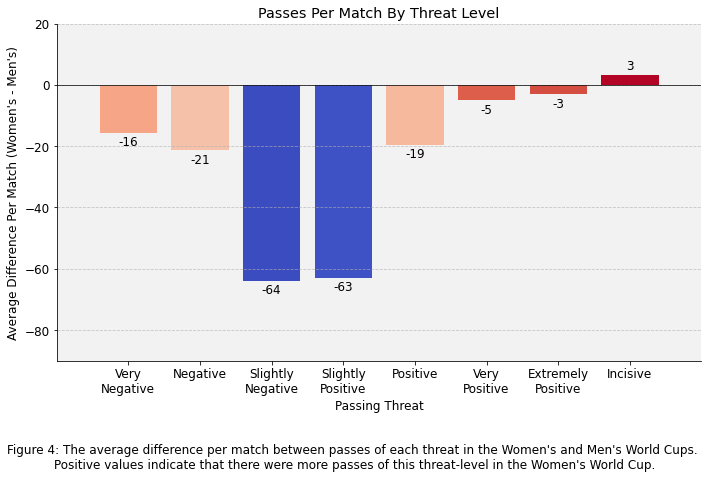

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Your data
rs = np.copy(pts)
percentage_diff = (rs[:,1] - rs[:,0])/64

# Create the figure and axis
plt.rcParams.update({'font.size': 12})
fig, ax = plt.subplots(figsize=(10, 6))

# Create the bar plot with a color gradient
colormap = plt.cm.get_cmap('coolwarm')
bars = ax.bar(np.arange(8), percentage_diff, color=[colormap((val - min(percentage_diff)) / (max(percentage_diff) - min(percentage_diff))) for val in percentage_diff])

# Add a horizontal line at y=0
ax.axhline(0, color='black', linewidth=0.7)

# Customize the x-axis ticks
ax.set_xticks(np.arange(8))
tick_labels = ["Very\nNegative","Negative","Slightly\nNegative","Slightly\nPositive","Positive","Very\nPositive","Extremely\nPositive","Incisive"]

ax.set_xticklabels(tick_labels)

# Set the x-axis limits
ax.set_xlim([-1, 8])
ax.set_ylim([-90, 20])
# Set labels for the x and y axes
ax.set_xlabel('Passing Threat')
ax.set_ylabel("Average Difference Per Match (Women's - Men's)")

# Add a title
ax.set_title('Passes Per Match By Threat Level')

# Add gridlines
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Add a legend (optional)
# ax.legend(['Percentage Difference'])

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for val,bar in zip(percentage_diff,bars):
    height = bar.get_height()
    if val < 0:
        ax.annotate(f'{height:.0f}', 
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, -3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='top')
    else:
        ax.annotate(f'{height:.0f}', 
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
# Add data labels above each bar



# Set a fancy-looking grey background color
ax.set_facecolor('#f2f2f2')

# Adjust plot layout
plt.tight_layout()
plt.figtext(0.5, -0.1,"Figure 4: The average difference per match between passes of each threat in the Women's and Men's World Cups. \nPositive values indicate that there were more passes of this threat-level in the Women's World Cup.", ha='center')
plt.savefig('Passing_Threat.jpg',dpi=300, bbox_inches='tight')
# Show the plot
plt.show()




In [19]:
apasses = []
for data in mdata:
    

    keys = list(data.keys())
    for key in keys:

        if data[key]['type']['name'] == 'Pass':

            pt_out = smoothed_data[min(119,int(data[key]['pass']['end_location'][0])),min(79,int(data[key]['pass']['end_location'][1]))]
            pt_in =  smoothed_data[min(119,int(data[key]['location'][0])),min(79,int(data[key]['location'][1]))]
            apasses.append([-pt_in+pt_out])
            
        
apassesw = []
for data in wdata:
    

    keys = list(data.keys())
    for key in keys:

        if data[key]['type']['name'] == 'Pass':

            pt_out = smoothed_data[min(119,int(data[key]['pass']['end_location'][0])),min(79,int(data[key]['pass']['end_location'][1]))]
            pt_in =  smoothed_data[min(119,int(data[key]['location'][0])),min(79,int(data[key]['location'][1]))]
            apassesw.append([-pt_in+pt_out])
apasses = np.array(apasses)
apassesw = np.array(apassesw)

In [20]:
xpt_m = (np.expand_dims(np.array(xgs_m),1)*apasses)
xpt_w = np.expand_dims(np.array(xgs_w),1)*apassesw


In [21]:
xpts = np.zeros((8,2)) 
arrs = [xpt_m,xpt_w]
for n in range(2):
    arr = np.array(arrs[n])
    xpts[0,n] = np.sum(arr < -0.0005)
    xpts[1,n] = np.sum(arr < - 0.00025) - xpts[0,n]
    xpts[2,n] = np.sum(arr < 0) - np.sum(xpts[:2,n])
    xpts[3,n] = np.sum(arr < 0.0005) - np.sum(xpts[:3,n])
    xpts[4,n] = np.sum(arr < 0.001) - np.sum(xpts[:4,n])
    xpts[5,n] = np.sum(arr < 0.0015) - np.sum(xpts[:5,n])
    
    xpts[6,n] = np.sum(arr < 0.002) - np.sum(xpts[:6,n])
    xpts[7,n] = np.sum(arr < 100) - np.sum(xpts[:7,n])
    

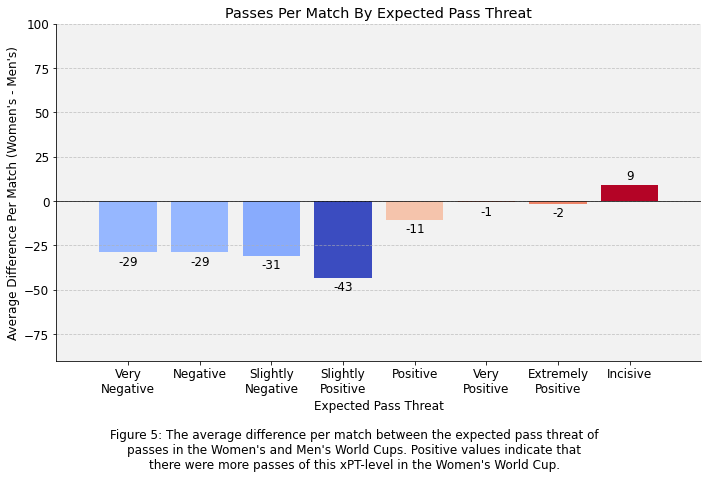

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Your data
rs = np.copy(xpts)
percentage_diff = (rs[:,1] - rs[:,0])/64

# Create the figure and axis
plt.rcParams.update({'font.size': 12})
fig, ax = plt.subplots(figsize=(10, 6))

# Create the bar plot with a color gradient
colormap = plt.cm.get_cmap('coolwarm')
bars = ax.bar(np.arange(8), percentage_diff, color=[colormap((val - min(percentage_diff)) / (max(percentage_diff) - min(percentage_diff))) for val in percentage_diff])

# Add a horizontal line at y=0
ax.axhline(0, color='black', linewidth=0.7)

# Customize the x-axis ticks
ax.set_xticks(np.arange(8))
tick_labels = ["Very\nNegative","Negative","Slightly\nNegative","Slightly\nPositive","Positive","Very\nPositive","Extremely\nPositive","Incisive"]

ax.set_xticklabels(tick_labels)

# Set the x-axis limits
ax.set_xlim([-1, 8])
ax.set_ylim([-90, 100])
# Set labels for the x and y axes
ax.set_xlabel('Expected Pass Threat')
ax.set_ylabel("Average Difference Per Match (Women's - Men's)")

# Add a title
ax.set_title('Passes Per Match By Expected Pass Threat')

# Add gridlines
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Add a legend (optional)
# ax.legend(['Percentage Difference'])

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for val,bar in zip(percentage_diff,bars):
    height = bar.get_height()
    if val < 0:
        ax.annotate(f'{height:.0f}', 
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, -3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='top')
    else:
        ax.annotate(f'{height:.0f}', 
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
# Add data labels above each bar



# Set a fancy-looking grey background color
ax.set_facecolor('#f2f2f2')

# Adjust plot layout
plt.tight_layout()
plt.figtext(0.5, -0.1,"Figure 5: The average difference per match between the expected pass threat of\npasses in the Women's and Men's World Cups. Positive values indicate that\nthere were more passes of this xPT-level in the Women's World Cup.", ha='center')
plt.savefig('Expected_Passing_Threat.jpg',dpi=300, bbox_inches='tight')
# Show the plot
plt.show()


